In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [3]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df = df.rename(columns={
    'school': 'Sekolah',
    'sex': 'Jenis_Kelamin',
    'age': 'Usia',
    'address': 'Alamat',
    'famsize': 'Ukuran_Keluarga',
    'Pstatus': 'Status_Ortu',
    'Medu': 'Pendidikan_Ibu',
    'Fedu': 'Pendidikan_Ayah',
    'Mjob': 'Pekerjaan_Ibu',
    'Fjob': 'Pekerjaan_Ayah',
    'reason': 'Alasan_Memilih_Sekolah',
    'guardian': 'Wali',
    'traveltime': 'Waktu_Pergi',
    'studytime': 'Waktu_Belajar',
    'failures': 'Gagal_Pelajaran',
    'schoolsup': 'Dukungan_Sekolah',
    'famsup': 'Dukungan_Keluarga',
    'paid': 'Kursus_Bayar',
    'activities': 'Aktivitas_Ekstra',
    'nursery': 'Pernah_Paud',
    'higher': 'Ingin_Kuliah',
    'internet': 'Ada_Internet',
    'romantic': 'Hubungan_Romantis',
    'famrel': 'Hubungan_Keluarga',
    'freetime': 'Waktu_Luang',
    'goout': 'Keluar_Teman',
    'Dalc': 'Konsumsi_Alkohol_Harian',
    'Walc': 'Konsumsi_Alkohol_Mingguan',
    'health': 'Kesehatan',
    'absences': 'Ketidakhadiran',
    'G1': 'Nilai_1',
    'G2': 'Nilai_2',
    'G3': 'Nilai_Akhir'
})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sekolah                    395 non-null    object
 1   Jenis_Kelamin              395 non-null    object
 2   Usia                       395 non-null    int64 
 3   Alamat                     395 non-null    object
 4   Ukuran_Keluarga            395 non-null    object
 5   Status_Ortu                395 non-null    object
 6   Pendidikan_Ibu             395 non-null    int64 
 7   Pendidikan_Ayah            395 non-null    int64 
 8   Pekerjaan_Ibu              395 non-null    object
 9   Pekerjaan_Ayah             395 non-null    object
 10  Alasan_Memilih_Sekolah     395 non-null    object
 11  Wali                       395 non-null    object
 12  Waktu_Pergi                395 non-null    int64 
 13  Waktu_Belajar              395 non-null    int64 
 14  Gagal_Pela

In [6]:
df = df.drop(columns=["Sekolah"])

In [7]:
df.head()

,Jenis_Kelamin,Usia,Alamat,Ukuran_Keluarga,Status_Ortu,Pendidikan_Ibu,Pendidikan_Ayah,Pekerjaan_Ibu,Pekerjaan_Ayah,Alasan_Memilih_Sekolah,...,Hubungan_Keluarga,Waktu_Luang,Keluar_Teman,Konsumsi_Alkohol_Harian,Konsumsi_Alkohol_Mingguan,Kesehatan,Ketidakhadiran,Nilai_1,Nilai_2,Nilai_Akhir
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


In [9]:
# Salin dataframe
df_encoded = df.copy()

# Ubah target ke klasifikasi
def konversi_nilai(nilai):
    if nilai < 10:
        return "Rendah"
    elif nilai < 15:
        return "Sedang"
    else:
        return "Tinggi"

df_encoded["Nilai_Akhir"] = df_encoded["Nilai_Akhir"].apply(konversi_nilai)

In [10]:
# One-hot encoding
kolom_kategorikal = [
    'Jenis_Kelamin', 'Alamat', 'Ukuran_Keluarga', 'Status_Ortu',
    'Pekerjaan_Ibu', 'Pekerjaan_Ayah', 'Alasan_Memilih_Sekolah', 'Wali',
    'Dukungan_Sekolah', 'Dukungan_Keluarga', 'Kursus_Bayar', 'Aktivitas_Ekstra',
    'Pernah_Paud', 'Ingin_Kuliah', 'Ada_Internet', 'Hubungan_Romantis'
]

df_encoded = pd.get_dummies(df_encoded, columns=kolom_kategorikal, drop_first=False)

In [11]:
X = df_encoded.drop(columns=["Nilai_Akhir"])
y = df_encoded["Nilai_Akhir"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred), 3))
print("Macro F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 3))
print("Micro F1 Score:", round(f1_score(y_test, y_pred, average='micro'), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.886
Macro F1 Score: 0.899
Micro F1 Score: 0.886

Classification Report:
               precision    recall  f1-score   support

      Rendah       0.82      0.88      0.85        26
      Sedang       0.89      0.87      0.88        38
      Tinggi       1.00      0.93      0.97        15

    accuracy                           0.89        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.89      0.89      0.89        79



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-16-3490911593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Nilai_Akhir", data=df_encoded, palette="viridis")


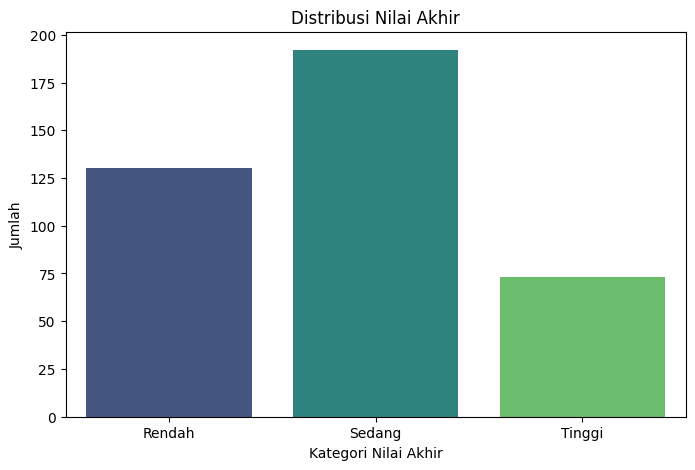

In [16]:
# Visualisasi 1: Distribusi target (Nilai_Akhir)
plt.figure(figsize=(8, 5))
sns.countplot(x="Nilai_Akhir", data=df_encoded, palette="viridis")
plt.title("Distribusi Nilai Akhir")
plt.xlabel("Kategori Nilai Akhir")
plt.ylabel("Jumlah")
plt.show()

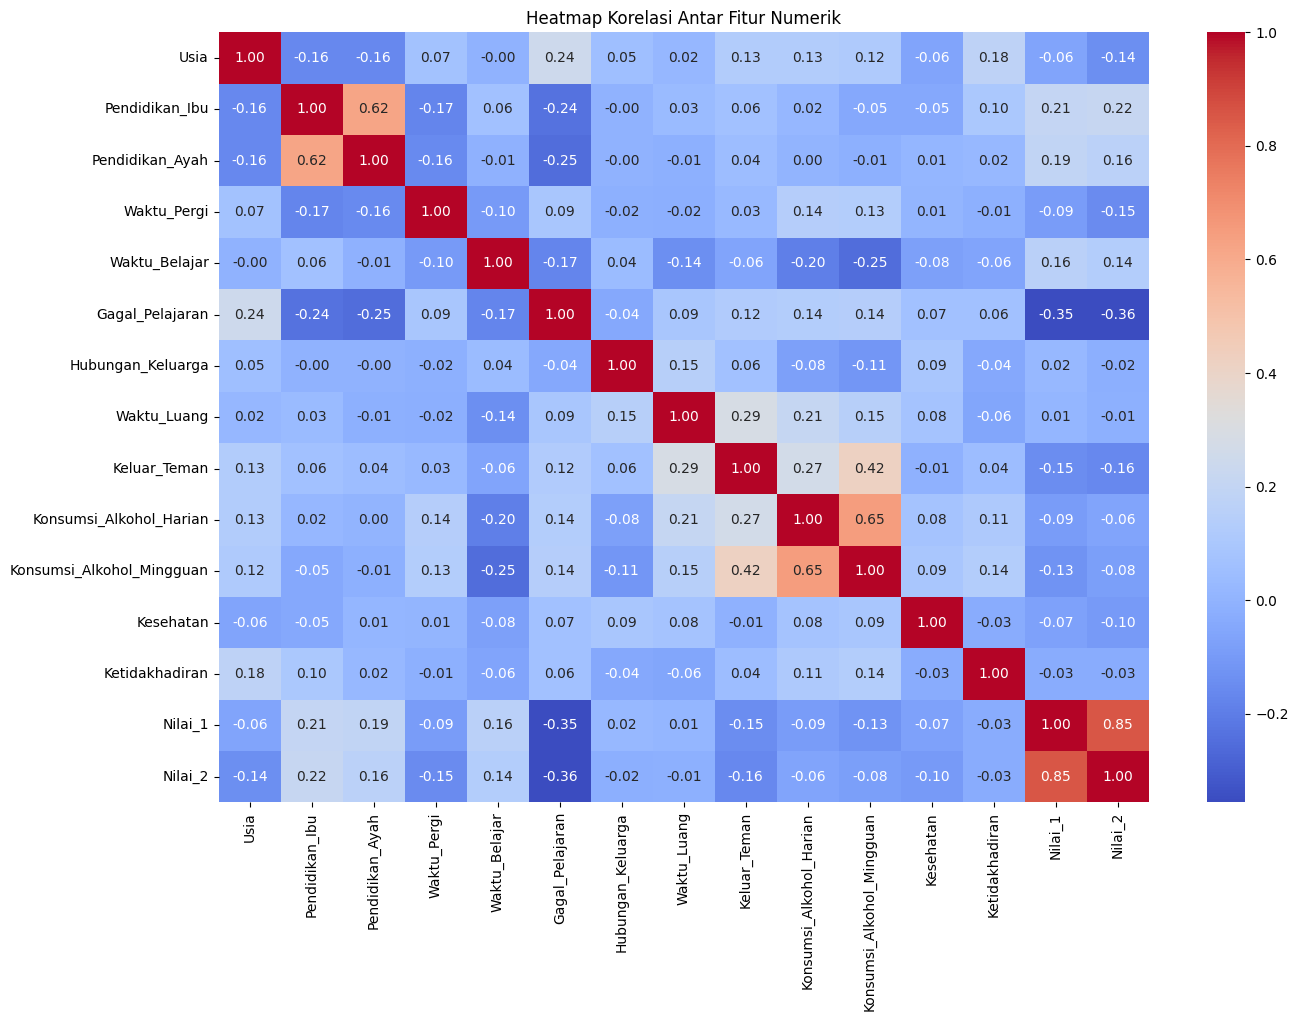

In [17]:
# Visualisasi 2: Korelasi heatmap antar fitur numerik
plt.figure(figsize=(15, 10))
numerical_columns = df_encoded.select_dtypes(include="number").columns
correlation_matrix = df_encoded[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

/tmp/ipython-input-18-1334810267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pentingnya", y="Fitur", data=feature_importance_df.head(10), palette="magma")


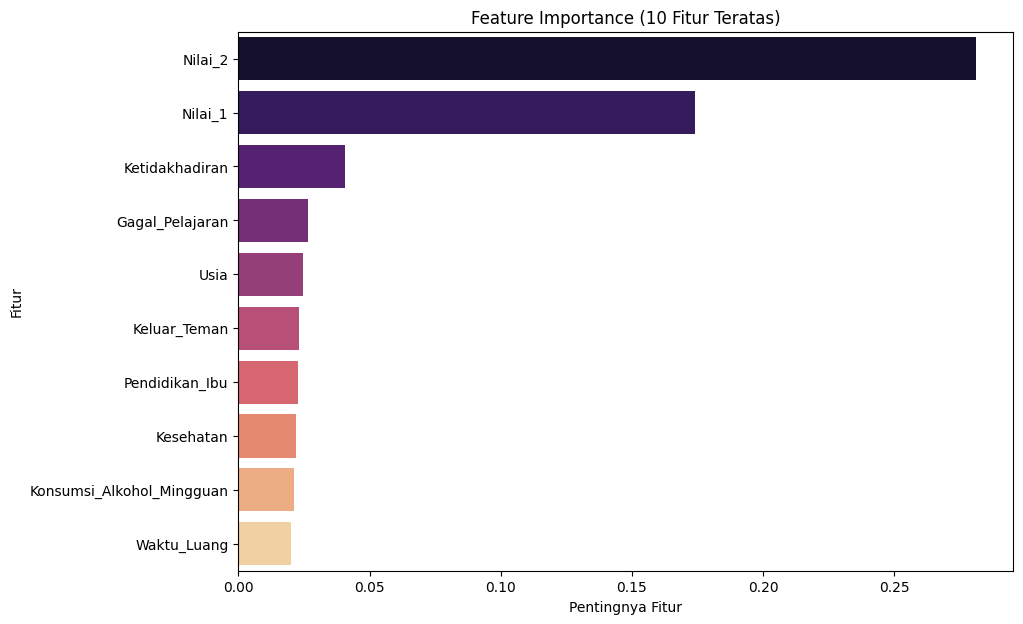

In [18]:
# Visualisasi 3: Feature Importance dari model Random Forest
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Fitur': features, 'Pentingnya': importances})
feature_importance_df = feature_importance_df.sort_values(by="Pentingnya", ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x="Pentingnya", y="Fitur", data=feature_importance_df.head(10), palette="magma")
plt.title("Feature Importance (10 Fitur Teratas)")
plt.xlabel("Pentingnya Fitur")
plt.ylabel("Fitur")
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Melatih model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [20]:
# Evaluasi model SVM
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1_macro = f1_score(y_test, y_pred_svm, average='macro')
svm_f1_micro = f1_score(y_test, y_pred_svm, average='micro')

In [21]:
# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model SVM:")
print(f"Akurasi: {svm_accuracy:.3f}")
print(f"Macro F1 Score: {svm_f1_macro:.3f}")
print(f"Micro F1 Score: {svm_f1_micro:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Hasil Evaluasi Model SVM:
Akurasi: 0.911
Macro F1 Score: 0.924
Micro F1 Score: 0.911

Classification Report:
              precision    recall  f1-score   support

      Rendah       0.88      0.85      0.86        26
      Sedang       0.90      0.92      0.91        38
      Tinggi       1.00      1.00      1.00        15

    accuracy                           0.91        79
   macro avg       0.93      0.92      0.92        79
weighted avg       0.91      0.91      0.91        79



In [23]:
def prediksi_nilai(
    usia, pendidikan_ibu, pendidikan_ayah, waktu_pergi, waktu_belajar,
    gagal_pelajaran, hubungan_keluarga, waktu_luang, keluar_teman,
    alkohol_harian, alkohol_mingguan, kesehatan, ketidakhadiran,
    nilai_1, nilai_2, jenis_kelamin, alamat, ukuran_keluarga,
    status_ortu, pekerjaan_ibu, pekerjaan_ayah, alasan_sekolah,
    wali, dukungan_sekolah, dukungan_keluarga, kursus_bayar,
    aktivitas_ekstra, pernah_paud, ingin_kuliah, ada_internet,
    hubungan_romantis
):
    input_data = {
        'Usia': usia,
        'Pendidikan_Ibu': pendidikan_ibu,
        'Pendidikan_Ayah': pendidikan_ayah,
        'Waktu_Pergi': waktu_pergi,
        'Waktu_Belajar': waktu_belajar,
        'Gagal_Pelajaran': gagal_pelajaran,
        'Hubungan_Keluarga': hubungan_keluarga,
        'Waktu_Luang': waktu_luang,
        'Keluar_Teman': keluar_teman,
        'Konsumsi_Alkohol_Harian': alkohol_harian,
        'Konsumsi_Alkohol_Mingguan': alkohol_mingguan,
        'Kesehatan': kesehatan,
        'Ketidakhadiran': ketidakhadiran,
        'Nilai_1': nilai_1,
        'Nilai_2': nilai_2,
        'Jenis_Kelamin': jenis_kelamin,
        'Alamat': alamat,
        'Ukuran_Keluarga': ukuran_keluarga,
        'Status_Ortu': status_ortu,
        'Pekerjaan_Ibu': pekerjaan_ibu,
        'Pekerjaan_Ayah': pekerjaan_ayah,
        'Alasan_Memilih_Sekolah': alasan_sekolah,
        'Wali': wali,
        'Dukungan_Sekolah': dukungan_sekolah,
        'Dukungan_Keluarga': dukungan_keluarga,
        'Kursus_Bayar': kursus_bayar,
        'Aktivitas_Ekstra': aktivitas_ekstra,
        'Pernah_Paud': pernah_paud,
        'Ingin_Kuliah': ingin_kuliah,
        'Ada_Internet': ada_internet,
        'Hubungan_Romantis': hubungan_romantis
    }

    input_df = pd.DataFrame([input_data])


    input_encoded = pd.get_dummies(input_df)

    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]

    pred = model.predict(input_encoded)[0]
    return f"🎯 **Prediksi Nilai Akhir:** `{pred}`"


In [24]:
import gradio as gr

ui = gr.Interface(
    fn=prediksi_nilai,
    inputs=[
        gr.Number(label="Usia"),
        gr.Number(label="Pendidikan Ibu"),
        gr.Number(label="Pendidikan Ayah"),
        gr.Number(label="Waktu Perjalanan ke Sekolah"),
        gr.Number(label="Waktu Belajar"),
        gr.Number(label="Jumlah Gagal Pelajaran"),
        gr.Number(label="Hubungan Keluarga"),
        gr.Number(label="Waktu Luang"),
        gr.Number(label="Sering Keluar dengan Teman"),
        gr.Number(label="Konsumsi Alkohol (Harian)"),
        gr.Number(label="Konsumsi Alkohol (Mingguan)"),
        gr.Number(label="Kesehatan"),
        gr.Number(label="Jumlah Ketidakhadiran"),
        gr.Number(label="Nilai Ujian Pertama (G1)"),
        gr.Number(label="Nilai Ujian Kedua (G2)"),
        gr.Radio(["F", "M"], label="Jenis Kelamin"),
        gr.Radio(["U", "R"], label="Alamat"),
        gr.Radio(["LE3", "GT3"], label="Ukuran Keluarga"),
        gr.Radio(["T", "A"], label="Status Orang Tua"),
        gr.Dropdown(["at_home", "health", "services", "teacher", "other"], label="Pekerjaan Ibu"),
        gr.Dropdown(["at_home", "health", "services", "teacher", "other"], label="Pekerjaan Ayah"),
        gr.Dropdown(["home", "reputation", "course", "other"], label="Alasan Memilih Sekolah"),
        gr.Dropdown(["mother", "father", "other"], label="Wali"),
        gr.Radio(["yes", "no"], label="Dukungan Sekolah"),
        gr.Radio(["yes", "no"], label="Dukungan Keluarga"),
        gr.Radio(["yes", "no"], label="Kursus Berbayar"),
        gr.Radio(["yes", "no"], label="Aktivitas Ekstrakurikuler"),
        gr.Radio(["yes", "no"], label="Pernah PAUD"),
        gr.Radio(["yes", "no"], label="Ingin Kuliah"),
        gr.Radio(["yes", "no"], label="Ada Internet di Rumah"),
        gr.Radio(["yes", "no"], label="Hubungan Romantis")
    ],
    outputs=gr.Markdown(),
    title="🎓 Prediksi Kategori Nilai Akhir Siswa",
    description="Masukkan data siswa untuk mengetahui prediksi nilai akhirnya: Rendah, Sedang, atau Tinggi.",
    theme="default"
)

In [28]:
contoh_input = {
    'usia': 18,
    'pendidikan_ibu': 4,
    'pendidikan_ayah': 3,
    'waktu_pergi': 1,
    'waktu_belajar': 2,
    'gagal_pelajaran': 0,
    'hubungan_keluarga': 4,
    'waktu_luang': 3,
    'keluar_teman': 3,
    'alkohol_harian': 1,
    'alkohol_mingguan': 2,
    'kesehatan': 4,
    'ketidakhadiran': 2,
    'nilai_1': 15,
    'nilai_2': 16,
    'jenis_kelamin': 'F',
    'alamat': 'U',
    'ukuran_keluarga': 'GT3',
    'status_ortu': 'T',
    'pekerjaan_ibu': 'teacher',
    'pekerjaan_ayah': 'services',
    'alasan_sekolah': 'reputation',
    'wali': 'mother',
    'dukungan_sekolah': 'yes',
    'dukungan_keluarga': 'yes',
    'kursus_bayar': 'yes',
    'aktivitas_ekstra': 'yes',
    'pernah_paud': 'yes',
    'ingin_kuliah': 'yes',
    'ada_internet': 'yes',
    'hubungan_romantis': 'no'
}

print(prediksi_nilai(**contoh_input))


🎯 **Prediksi Nilai Akhir:** `Tinggi`


In [29]:
ui.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6ceea9ecd93982164.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
